<a href="https://colab.research.google.com/github/geomwangi007/Machine-Learning-Projects/blob/main/Breast_Cancer_Classification_with_a_simple_Neural_Network_(NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Classification with a simple Neural Network (NN)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
import pandas as pd


In [ ]:
#Loading the dataset
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()


In [ ]:
breast_cancer

In [ ]:
#Storing the outputs in a dataframe
df = pd.DataFrame(breast_cancer.data , columns = breast_cancer.feature_names)


In [ ]:
#Adding the target column to the dataframe
df["Label"] = breast_cancer["target"]


'malignant' ---- 0
'benign'---- 1

In [ ]:
#printing the first five row
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape

(569, 31)

In [ ]:
#Checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Label                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#Statistics measures of the dataset
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#Checking the target distribution
df["Label"].value_counts()

1    357
0    212
Name: Label, dtype: int64

In [ ]:
df.groupby("Label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
x = df.drop(columns = "Label" , axis = 1)
y = df["Label"]

In [ ]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Label, Length: 569, dtype: int64

In [ ]:
x_train ,x_test ,y_train ,y_test = train_test_split( x , y , test_size = 0.2 , random_state = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)


In [ ]:
x_train_std

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [ ]:
print(x.shape,x_train.shape ,x_test.shape )


(569, 30) (455, 30) (114, 30)


***Building a Neural Network***

In [ ]:
#Importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
#Setting up the Neural net layers
model = keras.Sequential([ keras.layers.Flatten(input_shape = (30,)),
                          keras.layers.Dense(20 , activation = "relu"),
                          keras.layers.Dense(2 , activation = "sigmoid")

                          ])

In [ ]:
#Compiling the neural network
model.compile(optimizer="adam",
               loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
#trainin the neural net
history = model.fit(x_train_std, y_train ,validation_split = 0.1 , epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 22ms/step - loss: 0.3861 - accuracy: 0.8875 - val_loss: 0.2822 - val_accuracy: 0.9348
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2850 - accuracy: 0.9169 - val_loss: 0.2096 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2261 - accuracy: 0.9438 - val_loss: 0.1688 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1895 - accuracy: 0.9462 - val_loss: 0.1425 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1628 - accuracy: 0.9535 - val_loss: 0.1246 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1432 - accuracy: 0.9609 - val_loss: 0.1121 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1283 - accuracy: 0.9658 - val_loss: 0.1022 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

**Visualizing accuracy and the loss*

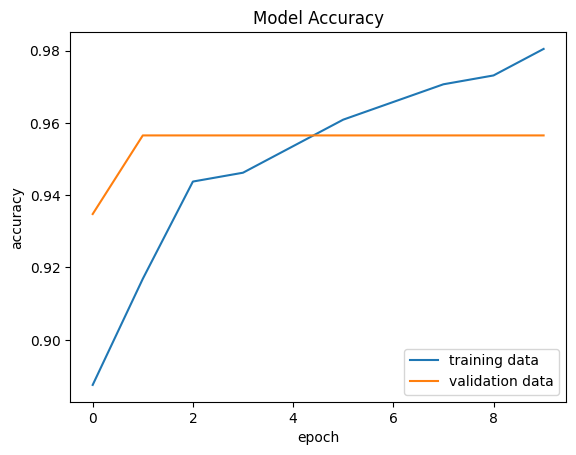

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data", "validation data"] ,loc ='lower right')

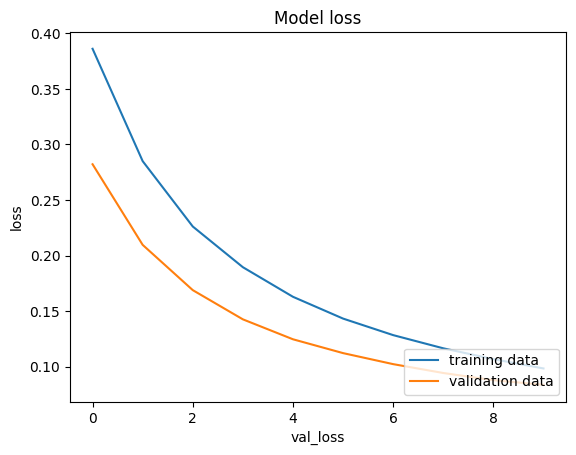

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("val_loss")

plt.legend(["training data", "validation data"] ,loc ='lower right')

In [ ]:
#Test the neural network on the test data
#Accuracy of the model

loss, accuracy = model.evaluate(x_test_std , y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1123 - accuracy: 0.9561
0.9561403393745422


In [ ]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [ ]:
y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 5ms/step


In [ ]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.34229958 0.7811633 ]


In [ ]:
print(y_pred.shape)
print(x_test_std.shape)

(114, 2)
(114, 30)


Model.predict() gives back prediction probability of each class for that datapoint

In [ ]:
#Converting the prediction to Labels

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


**Building the Predicting system**

In [ ]:
input_data = (18.61,20.25,122.1,1094,0.0944,0.1066,0.149,0.07731,0.1697,0.05699,0.8529,1.849,5.632,93.54,0.01075,0.02722,0.05081,0.01911,0.02293,0.004217,21.31,27.26,139.9,1403,0.1338,0.2117,0.3446,0.149,0.2341,0.07421)

#Change the input data to a numpy array

input_data_as_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one data point
input_data_reshaped = np.reshape(input_data_as_array , (1 ,-1 ))

#Data standardization
input_data_reshaped = np.reshape(input_data_as_array , (1 ,-1 ))
input_data_std = scaler.transform(input_data_reshaped)

#prediction
prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label == 0):
  print("The tumor is Malignant")

else:
  print("The tumor is Benign")

1/1 [==============================] - 0s 32ms/step
[[0.9490929  0.41419357]]
[0]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
